# Titanic Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
dataset.head() # data is already labeled
# 0 is dead and 1 is survided


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
dataset.loc[dataset['Fare'] == 0.00]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Number of $0.00 fare tickets = 15
Number of $250.00 or more fare tickets = 9


<Axes: xlabel='Fare', ylabel='Count'>

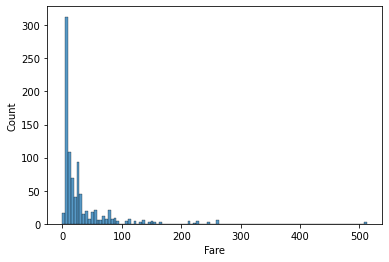

In [ ]:
dataset.loc[[dataset['Fare'].min()]]
print('Number of $0.00 fare tickets = {}'.format(len(dataset.loc[dataset['Fare'] == 0.00])))
print('Number of $250.00 or more fare tickets = {}'.format(len(dataset.loc[dataset['Fare'] > 250.00])))
sns.histplot(dataset, x = 'Fare')


#sns.scatterplot(data = dataset, x = 'Fare',y = dataset['Survived'])

In [ ]:
dataset['FareBand'] = np.where(dataset['Fare'] >= 150.00,'High Price', 'low Price')


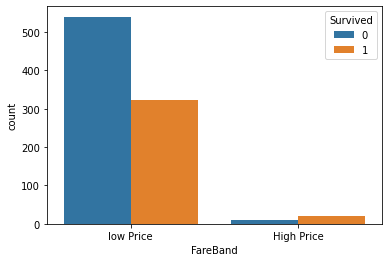

FareBand    Survived
High Price  0             9
            1            20
low Price   0           540
            1           322
Name: Survived, dtype: int64

In [ ]:
dataset['FareBand'].value_counts()
sns.countplot(data = dataset, x = 'FareBand',hue = "Survived")
plt.show()
dataset.groupby(["FareBand","Survived"])["Survived"].count()

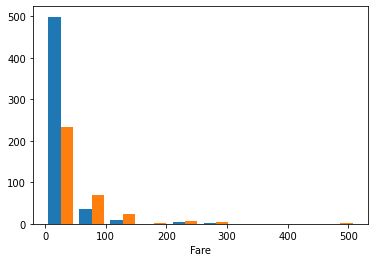

In [ ]:
plt.hist([dataset[dataset['Survived'] == 0]['Fare'], dataset[dataset['Survived'] == 1]['Fare']], label = dataset['Survived'])
plt.xlabel('Fare')
plt.show()

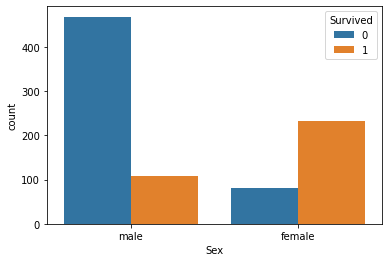

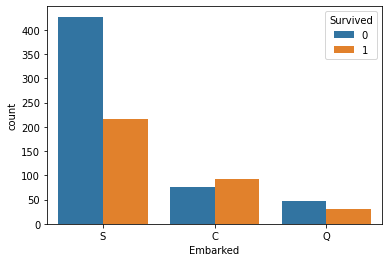

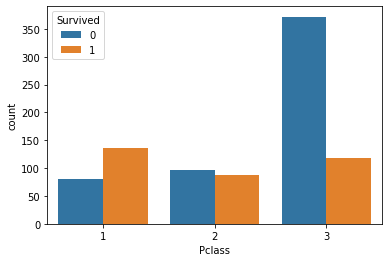

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
sns.countplot(data = dataset, x = 'Sex',hue = "Survived")
plt.show()
sns.countplot(data=dataset,x = 'Embarked',hue = "Survived")
plt.show()
sns.countplot(data=dataset,x='Pclass',hue='Survived')
plt.show()
dataset.groupby(['Sex','Survived'])['Survived'].count()

In [ ]:
dataset['Title'] = 0
dataset['Title'] =  dataset['Name'].str.extract(r'([A-Za-z]+)\.')

In [ ]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
pd.crosstab(dataset.Title,dataset.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Sir','Capt','HighClass','HighClass','HighClass','Capt','Sir','Capt','Sir','HighClass'],inplace=True)


In [ ]:
pd.crosstab(dataset.Title,dataset.Sex)

Sex,female,male
Title,,
Capt,0,5
HighClass,2,2
Master,0,40
Miss,186,0
Mr,0,517
Mrs,125,0
Sir,1,13


In [ ]:
dataset.groupby('Title')['Age'].mean()

Title
Capt         56.600000
HighClass    39.750000
Master        4.574167
Miss         21.860000
Mr           32.368090
Mrs          35.898148
Sir          43.076923
Name: Age, dtype: float64

In [ ]:
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Mr'),'Age']=33
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Mrs'),'Age']=36
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Master'),'Age']=5
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Miss'),'Age']=22
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Sir'),'Age']=43
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Nobal'),'Age']=40
dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Capt'),'Age']=57

In [ ]:
dataset['Age'].mean()

29.85316498316498

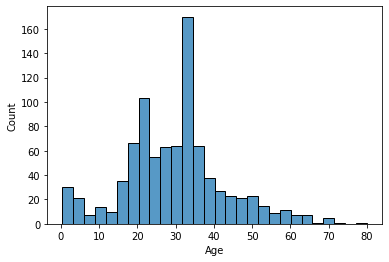

In [ ]:
sns.histplot(dataset, x = 'Age')

Total 891 observations. Missing some Age records..need to revisit to fill missing values. Wide range in Fare = (Lowest fare, highest fare) =  ($8, $512). Median is around $15, where as  mean price = $32. Outliers? There are 15 Passengers with $0 fare and 9 with fare > $250 and 3 with greater than $300. since using continuous variable to predict category variable, we are ok. Also, using Randomforests instead of Decision Tree would take care of this, if any. From the scatter plot, looks like, fare to survival is all over the place. Is this even a good predictor to consider?
There are more dead than Survived and, more male that are dead than female.


mean age is 29.85316498316498


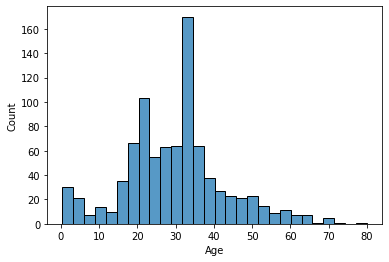

In [ ]:
sns.histplot(dataset, x = 'Age')
mean_age = dataset['Age'].mean()
# its not a perfect normally distributed, but, we can go with ND. So, we will fill nulls with mean value. Youngest are new borns (0-10 year olds) and oldest is (65 - 80 year olds)
print(f'mean age is {mean_age}')

mean age is 29.85316498316498


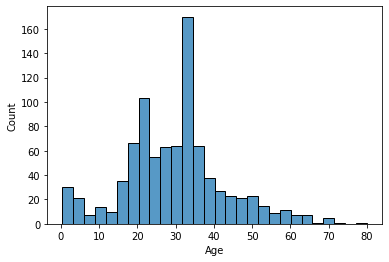

In [ ]:

dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
sns.histplot(dataset, x = 'Age')
print(f'mean age is {mean_age}')

In [ ]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FareBand         0
Title            0
dtype: int64

In [ ]:
dataset['Embarked'].fillna('S',inplace=True)

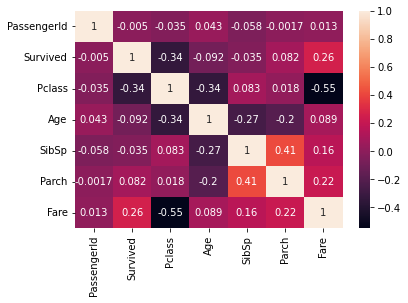

In [ ]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [ ]:
dataset['Age_band']=0
dataset.loc[dataset['Age']<=19,'Age_band']=0
dataset.loc[(dataset['Age']>19)&(dataset['Age']<=30),'Age_band']=1
dataset.loc[(dataset['Age']>30)&(dataset['Age']<=50),'Age_band']=2
dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60),'Age_band']=3
dataset.loc[dataset['Age']>60,'Age_band']=4
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand,Title,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,low Price,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,low Price,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,low Price,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,low Price,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,low Price,Mr,2


In [ ]:
dataset['Age_band'].value_counts().sort_values()

4     22
3     42
0    168
1    281
2    378
Name: Age_band, dtype: int64

In [ ]:
dataset['Fare_band']=0
dataset.loc[dataset['Fare']<=10.00,'Fare_band']=0
dataset.loc[(dataset['Fare']>10.00)&(dataset['Fare']<=25.00),'Fare_band']=1
dataset.loc[(dataset['Fare']>25.00)&(dataset['Fare']<=50.00),'Fare_band']=2
dataset.loc[(dataset['Fare']>50.00)&(dataset['Fare']<=150.00),'Fare_band']=3
dataset.loc[(dataset['Fare']>150.00),'Fare_band']=4

In [ ]:
dataset.loc[(dataset['Sex']=='male'),'Sex']=0
dataset.loc[(dataset['Sex']=='female'),'Sex']=1
dataset=pd.get_dummies(dataset, columns=['Embarked','Title','Pclass','Fare_band'])

In [ ]:
dataset.drop(['Name','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

In [ ]:
dataset.drop(['FareBand'], axis=1,inplace = True)

In [ ]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Age_band,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,...,Title_Mrs,Title_Sir,Pclass_1,Pclass_2,Pclass_3,Fare_band_0,Fare_band_1,Fare_band_2,Fare_band_3,Fare_band_4
0,0,0,22.0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,1,1,38.0,1,0,2,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1,1,26.0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,1,35.0,1,0,2,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,2,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
x = dataset.loc[:,dataset.columns != 'Survived']
y = dataset.loc[:,dataset.columns == 'Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)
kmeans_dt = KMeans(n_clusters=2, max_iter=100).fit(X_train,y_train )

In [ ]:
y_test.iloc[100].values

array([1])

In [ ]:
pred = kmeans_dt.predict(X_test)

In [ ]:
correct = 0
for i in range(len(X_test)):
  predict_me = np.array(X_test.iloc[i])
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = kmeans_dt.predict(predict_me)
  if prediction[0] == y_test['Survived'].iloc[i]:
      correct += 1

print(correct/len(X_test))

In [ ]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
print(type(X_test))

<class 'numpy.ndarray'>


In [ ]:
kmeans_dt = KMeans(n_clusters=2, max_iter=100).fit(X_train,y_train )
correct = 0
for i in range(len(X_test)):
  predict_me = np.array(X_test[i])
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = kmeans_dt.predict(predict_me)
  if prediction[0] == y_test['Survived'].iloc[i]:
      correct += 1

print(correct/len(X_test))

0.19282511210762332


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
x = dataset.loc[:,dataset.columns != 'Survived']
y = dataset.loc[:,dataset.columns == 'Survived']

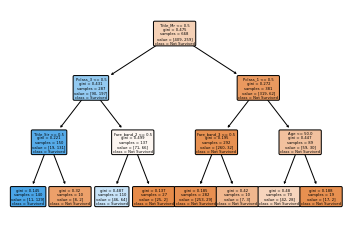

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)
clf_dt = DecisionTreeClassifier(random_state=5, max_depth = 3).fit(X_train,y_train )

predictions = clf_dt.predict(X_test)

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["Not Survived", "Survived"],
          feature_names=x.columns)
plt.savefig('out.pdf')
plt.show()